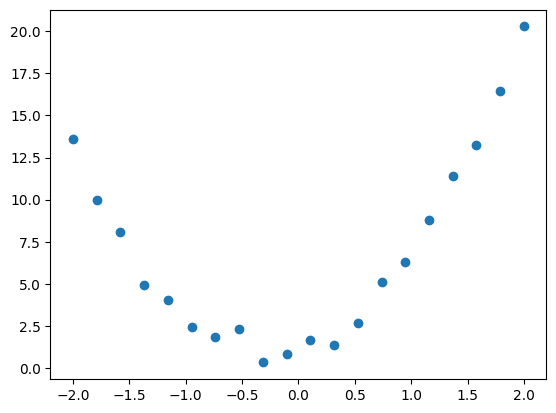

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 20)
y = 4 * x**2 + 2 * x + 1
noise = np.random.normal(0, 0.5, size=x.shape)
y += noise
plt.scatter(x, y);

In [7]:
from ipywidgets import interact

@interact(a=4.0, b=2.0, c=1.0)
def plot(a, b, c):
    y_pred = a * x**2 + b * x + c
    plt.scatter(x, y)
    plt.plot(x, y_pred);

interactive(children=(FloatSlider(value=4.0, description='a', max=12.0, min=-4.0), FloatSlider(value=2.0, desc…